In [1]:
import cv2

In [4]:
from matplotlib import pyplot as plt
import os
from tqdm import tqdm

In [5]:
path='C:/Users/Linto Sebastian/Documents/Ak/train/'

In [12]:
path1='C:/Users/Linto Sebastian/Documents/Ak/test/'

In [32]:
def images_read(filepath):
    images = []
    for filename in tqdm(os.listdir(filepath)):
        img = cv2.imread(filepath+filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_AREA)
        images.append(np.array(img))
    return images

In [6]:
files=os.listdir(path)

In [33]:
train_data=images_read(path)

100%|██████████████████████████████████████████████████████████████████████████████| 3662/3662 [10:00<00:00,  4.84it/s]


In [35]:
test_data=images_read(path1)

100%|██████████████████████████████████████████████████████████████████████████████| 1928/1928 [03:24<00:00,  9.41it/s]


In [37]:
np.save('train_data.npy',train_data)

In [38]:
np.save('test_data.npy',test_data)

In [4]:
tr=np.load('C:/Users/Linto Sebastian/Documents/Ak/BD/train_data1.npy')

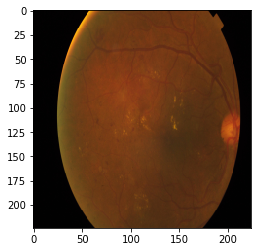

In [50]:
plt.imshow(train_data[0])

In [52]:
def prepro(data):
    gb_img=[]
    for i in range(len(data)):
        image=cv2.addWeighted(data[i],4, cv2.GaussianBlur(data[i], (0,0) , 224/10) ,-4 ,128)
        gb_img.append(image)
    return gb_img

In [53]:
gb_pp=prepro(train_data)

In [55]:
gb_tpp=prepro(test_data)

In [112]:
np.save('gb_train.npy',np.array(gb_pp))

In [113]:
np.save('gb_test.npy',np.array(gb_tpp))